In [1]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | krasnoye
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | ketchikan
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | puerto escondido
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | kirakira
Processing Record 18 of Set 1 | northam
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | chapais
Processing Record 22 of Set 1 | na

Processing Record 37 of Set 4 | santo anastacio
Processing Record 38 of Set 4 | yellowknife
Processing Record 39 of Set 4 | nemuro
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | tamalin
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | karpathos
Processing Record 44 of Set 4 | oneida
Processing Record 45 of Set 4 | teguise
Processing Record 46 of Set 4 | shitanjing
Processing Record 47 of Set 4 | mulchen
Processing Record 48 of Set 4 | hamamatsu
Processing Record 49 of Set 4 | pangody
Processing Record 50 of Set 4 | muisne
Processing Record 1 of Set 5 | lindi
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | rio grande
Processing Record 4 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 5 of Set 5 | praya
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | yaan
Processing Record 9 of Set 5 | torbay
Processing Record 10 of Set 

Processing Record 25 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 26 of Set 8 | sibu
Processing Record 27 of Set 8 | alekseyevsk
Processing Record 28 of Set 8 | gisors
Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | skibbereen
Processing Record 31 of Set 8 | carutapera
Processing Record 32 of Set 8 | emerald
Processing Record 33 of Set 8 | umm kaddadah
Processing Record 34 of Set 8 | talara
Processing Record 35 of Set 8 | suntar
Processing Record 36 of Set 8 | sisimiut
Processing Record 37 of Set 8 | santa maria
Processing Record 38 of Set 8 | bang saphan
Processing Record 39 of Set 8 | sakyla
Processing Record 40 of Set 8 | new panay
Processing Record 41 of Set 8 | lisakovsk
Processing Record 42 of Set 8 | amuntai
Processing Record 43 of Set 8 | faranah
Processing Record 44 of Set 8 | kudahuvadhoo
Processing Record 45 of Set 8 | kynsperk nad ohri
Processing Record 46 of Set 8 | tual
Processing Record 47 of Set 8 | terra nova
Processing R

Processing Record 14 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 12 | ancud
Processing Record 16 of Set 12 | jalu
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | mergui
City not found. Skipping...
Processing Record 19 of Set 12 | baykit
Processing Record 20 of Set 12 | khilok
Processing Record 21 of Set 12 | lavrentiya
Processing Record 22 of Set 12 | luan
Processing Record 23 of Set 12 | baturaja
Processing Record 24 of Set 12 | sijunjung
Processing Record 25 of Set 12 | itoman
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | sambava
Processing Record 28 of Set 12 | liverpool
Processing Record 29 of Set 12 | kreuztal
Processing Record 30 of Set 12 | belgrade
Processing Record 31 of Set 12 | leo
Processing Record 32 of Set 12 | penzance
Processing Record 33 of Set 12 | bull savanna
Processing Record 34 of Set 12 | sorong
Processing Record 35 of Set 12 | beira
Processing Record 36 of Set 12 | kulunda
Pro

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,17.94,76,100,4.99,GL,2022-05-04 02:30:49
1,Quatre Cocos,-20.2078,57.7625,77.11,79,14,11.99,MU,2022-05-04 02:30:49
2,Krasnoye,49.9145,24.6134,44.76,84,99,4.61,UA,2022-05-04 02:30:50
3,Carnarvon,-24.8667,113.6333,80.67,34,5,16.11,AU,2022-05-04 02:30:50
4,Butaritari,3.0707,172.7902,81.91,75,24,11.86,KI,2022-05-04 02:30:51
5,Hermanus,-34.4187,19.2345,60.80,94,5,7.45,ZA,2022-05-04 02:30:51
6,Saint George,37.1041,-113.5841,72.63,16,0,19.57,US,2022-05-04 02:26:59
7,Necochea,-38.5473,-58.7368,50.52,71,2,14.88,AR,2022-05-04 02:30:05
8,Ketchikan,55.3422,-131.6461,45.07,81,100,5.75,US,2022-05-04 02:30:54
9,Avarua,-21.2078,-159.7750,82.45,78,100,6.91,CK,2022-05-04 02:30:54


In [7]:
# Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-05-04 02:30:49,77.4840,-69.3632,17.94,76,100,4.99
1,Quatre Cocos,MU,2022-05-04 02:30:49,-20.2078,57.7625,77.11,79,14,11.99
2,Krasnoye,UA,2022-05-04 02:30:50,49.9145,24.6134,44.76,84,99,4.61
3,Carnarvon,AU,2022-05-04 02:30:50,-24.8667,113.6333,80.67,34,5,16.11
4,Butaritari,KI,2022-05-04 02:30:51,3.0707,172.7902,81.91,75,24,11.86
5,Hermanus,ZA,2022-05-04 02:30:51,-34.4187,19.2345,60.80,94,5,7.45
6,Saint George,US,2022-05-04 02:26:59,37.1041,-113.5841,72.63,16,0,19.57
7,Necochea,AR,2022-05-04 02:30:05,-38.5473,-58.7368,50.52,71,2,14.88
8,Ketchikan,US,2022-05-04 02:30:54,55.3422,-131.6461,45.07,81,100,5.75
9,Avarua,CK,2022-05-04 02:30:54,-21.2078,-159.7750,82.45,78,100,6.91


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

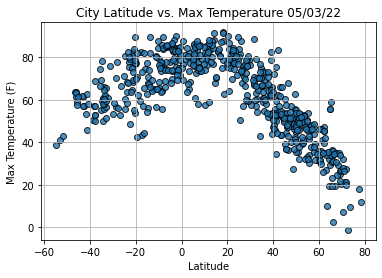

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/LatVsMaxTemp.png")

# Show plot.
plt.show()

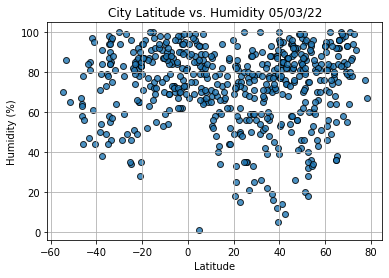

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsHumidity.png")
# Show plot.
plt.show()

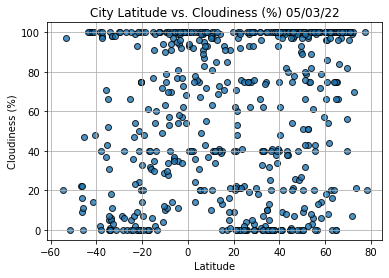

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsCloudiness.png")
# Show plot.
plt.show()

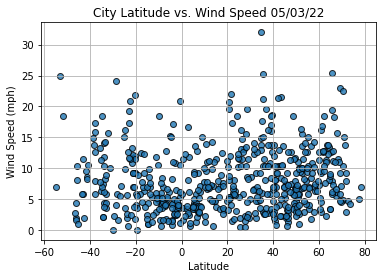

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsWindSpeed.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

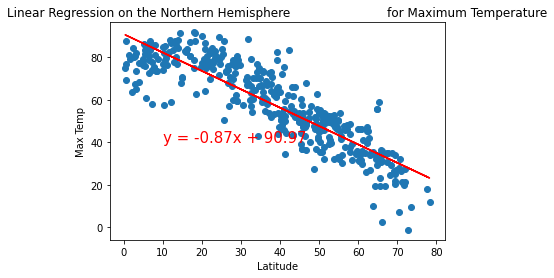

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

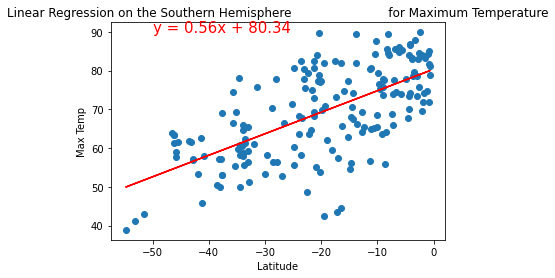

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

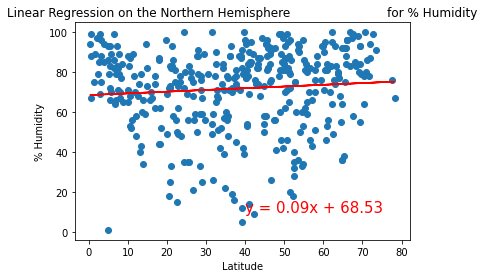

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

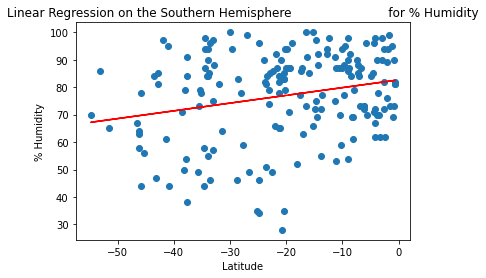

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

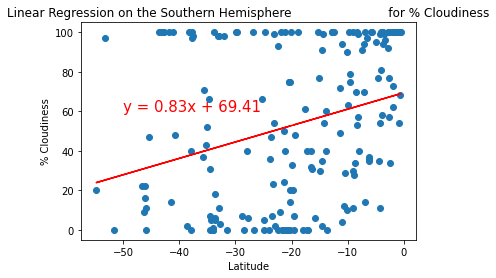

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

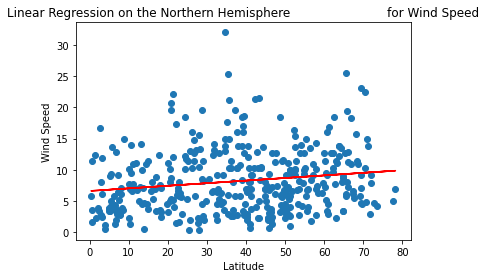

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

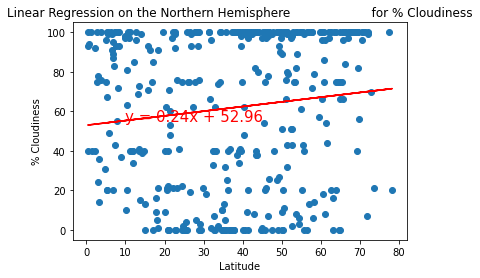

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

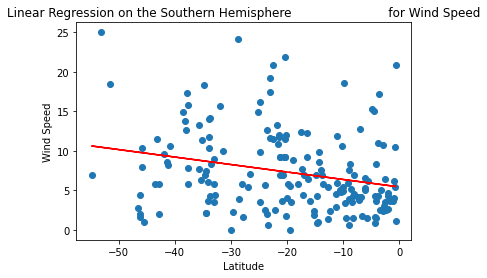

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

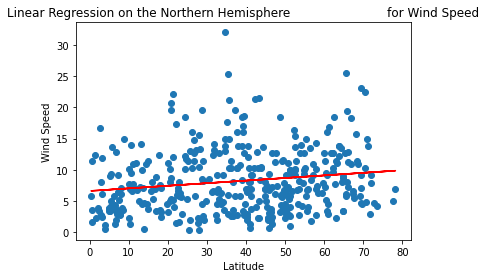

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

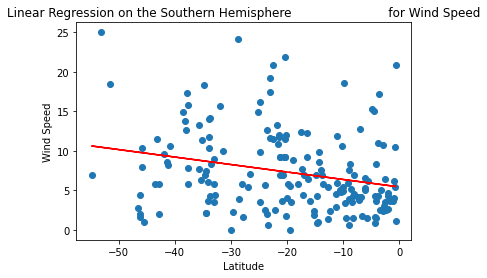

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))